In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.visualization import *
from src.evaluation import *
from src.m4_generator import M4Generator
from src.m4_evaluation_loss_functions import *
from src.utils import *
from src.visualization import plot_serie_and_prediction
from src.training_loss_functions import *

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers

import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


# Load Data Through Generator

In [7]:
EPOCHS = 50
BATCH_SIZE = 128
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 30
FEATURES_NUMBER = 2
CLIP_VALUE = 0.5
LEARNING_RATE = 0.01
DROPOUT_RATIO = 0.2

OUTPUT_SIZE = HORIZON*2
LOSS = mase
PI_PARAMS = {'max_coff': 0.25, 'min_coff': 0.15, 'step': 0.1}

stdAugmentation = StdAugmentation(PI_PARAMS)
diffAugmentation = DiffAugmentation()
x_augmentations = [stdAugmentation]
y_augmentations = [stdAugmentation]

train_path = "../Dataset/splitted/Hourly-train.csv"
test_path = "../Dataset/splitted/Hourly-test.csv"
train_holdout_path = "../Dataset/splitted/Hourly-train-holdout.csv"
test_holdout_path = "../Dataset/splitted/Hourly-test-holdout.csv"

data_loader = M4DataLoader(train_path, test_path, train_holdout_path, test_holdout_path,
                           x_augmentations, y_augmentations, LOOKBACK, HORIZON)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
holdout_x, holdout_y = data_loader.get_holdout_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE, FEATURES_NUMBER)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE, FEATURES_NUMBER)
holdout_data_generator = M4Generator(holdout_x, holdout_y, BATCH_SIZE, FEATURES_NUMBER)

# Decompose A Time Series
Decompose a time series to ( Seasonality, Trend, Residual). We note that the seasonality has frequencey of (24 hrs)


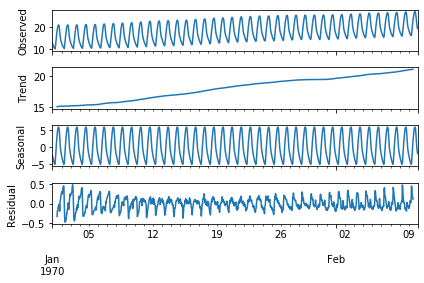

In [5]:
IDX = 300
x = data_loader.raw_train_data[IDX,:]
result = decompose_time_serie(x)

result.plot()
#plt.show()
plt.savefig('../../Presentations/second_pres/seasonality.png')

# Use Exponential Smoothing For Prediction
Exponential smoothing acts as a weighted moving average on the previous data points. The weights decreases exponentially as we move further in time. Here is an example of predicting a horizon of 48 time points for one time series using exponential smoothing from degree 3 ( i.e.: The smoothing is applied on the timeseries 3 components (Sesonality, Trend and Residual) )

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


(48,)


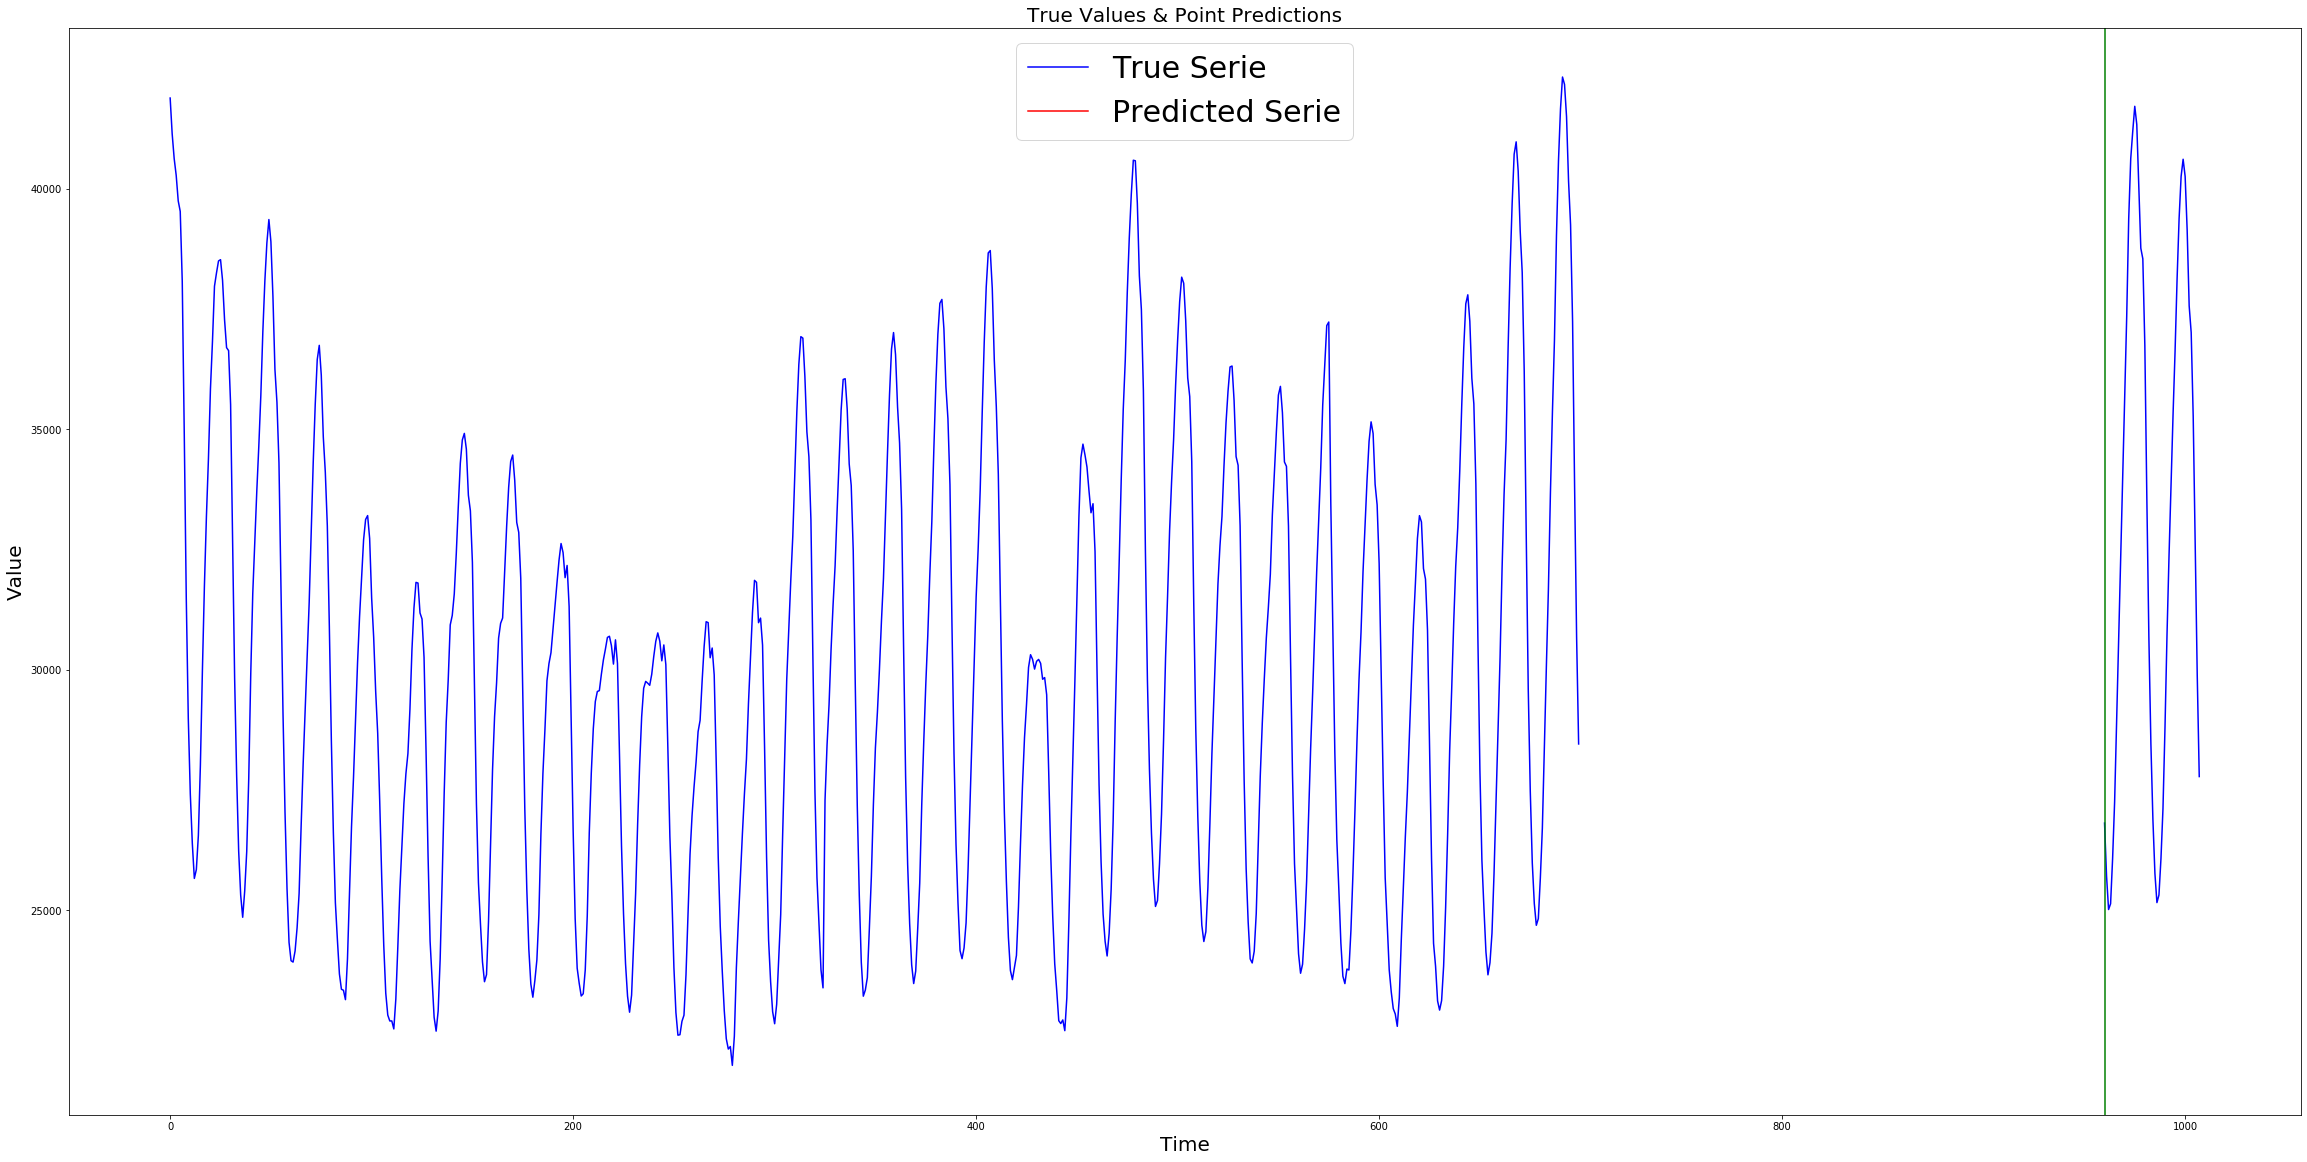

In [11]:
IDX = 10
x = data_loader.raw_train_data[IDX,:]
y = data_loader.raw_test_data[IDX, :]

prediction = exponential_smoothing(x)
print(prediction.shape)

plot_serie_and_prediction(x[:][np.newaxis], y[:][np.newaxis], prediction[:][np.newaxis])


# Exponential Smoothing Evaluation

In [9]:
#loss = evaluate_exponential_smoothing(test_x, test_y, smape)

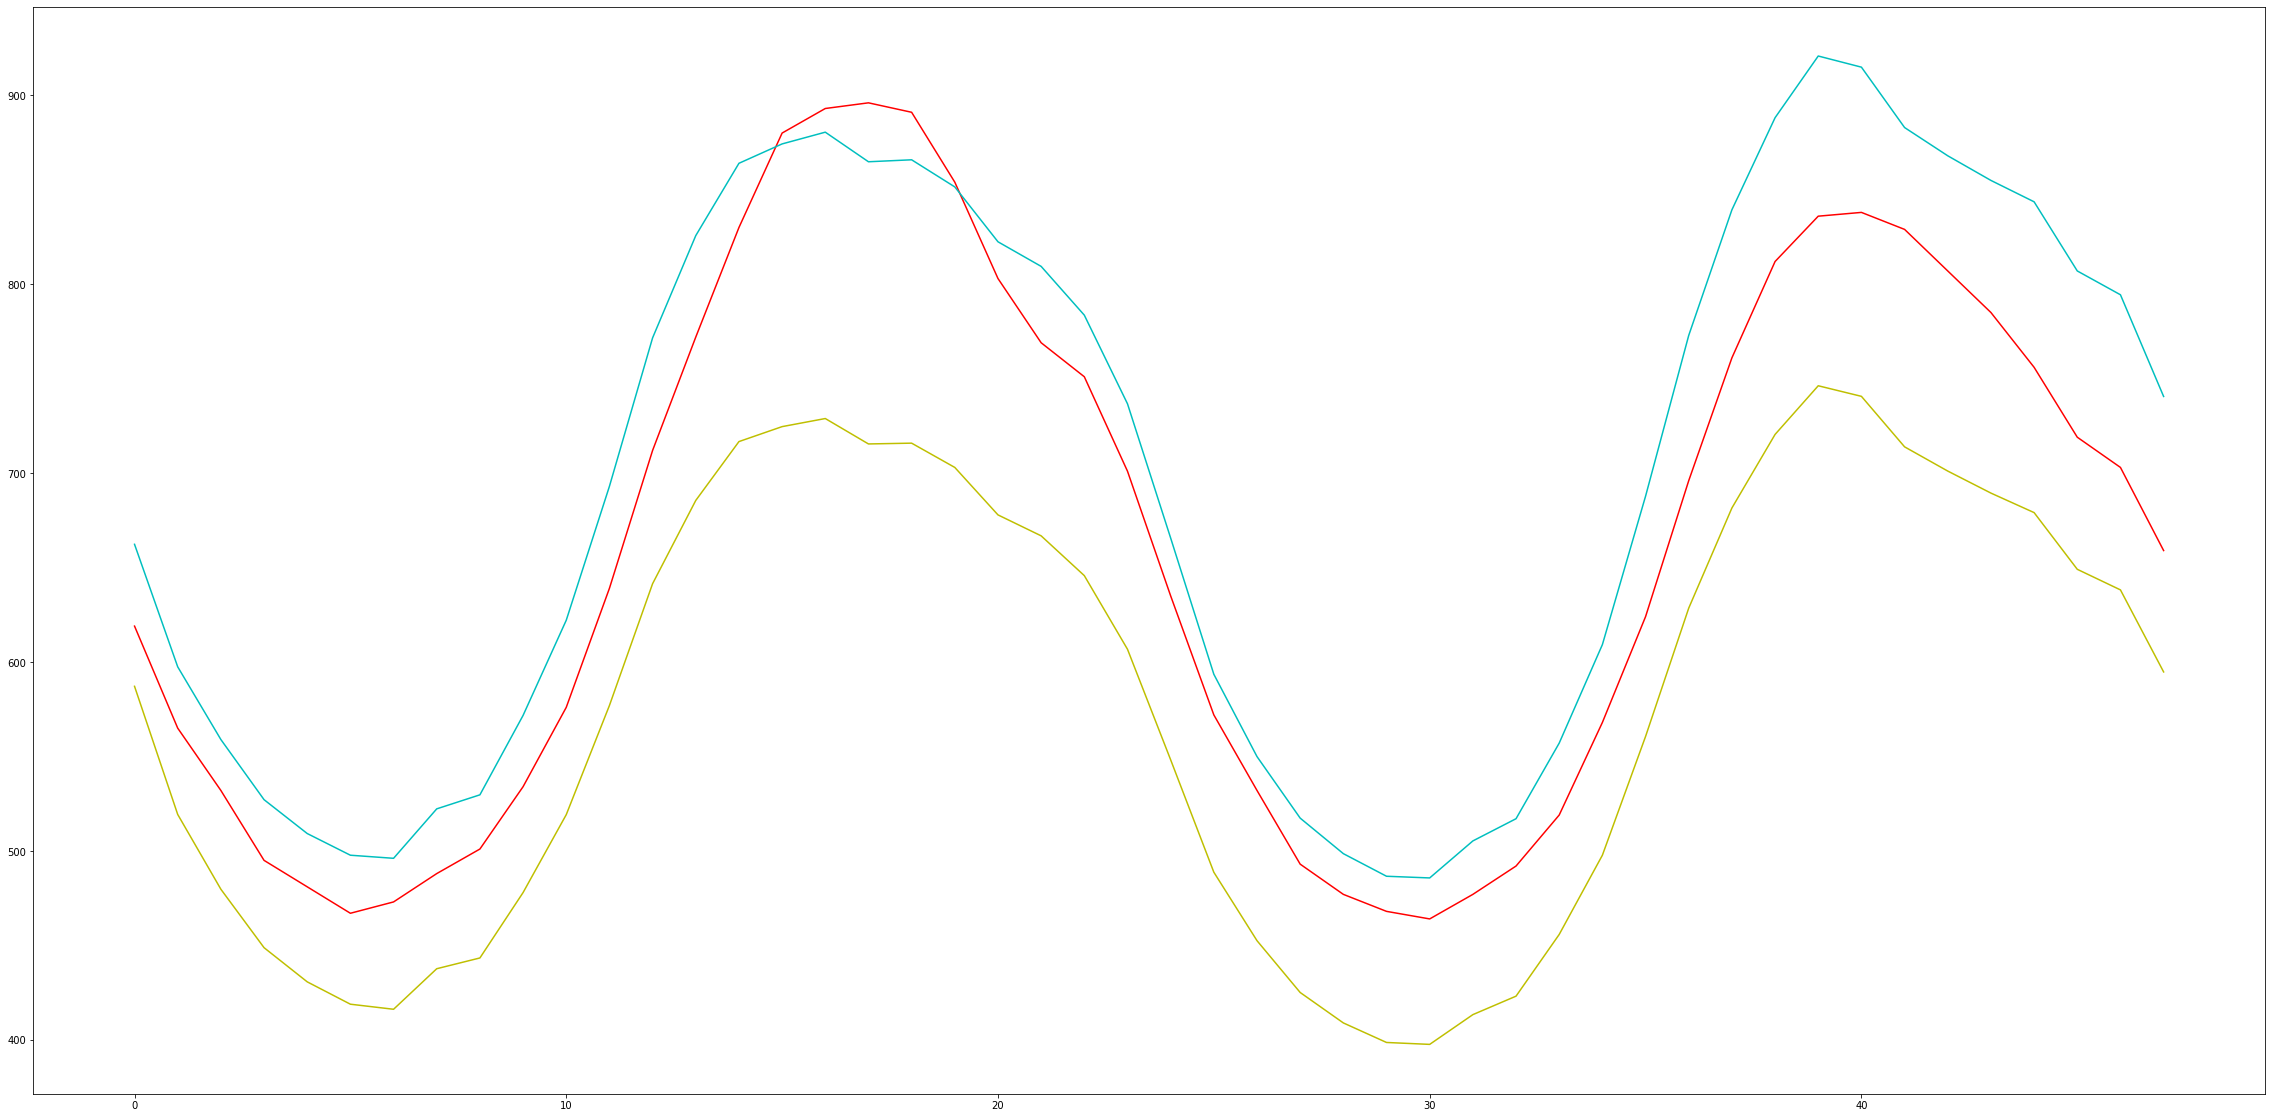

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

lower = np.array([587.133166666667,519.311166666667,479.713166666667,448.7835,430.6945,418.859833333333,416.1785,437.6425,443.339166666667,477.959166666667,519.193666666667,576.9785,641.4555,685.529166666667,716.682,724.600333333333,728.884833333333,715.4315,715.849166666667,702.998,677.8755,666.788166666667,645.724,606.755666666667,548.215833333333,488.733666666667,452.485166666667,425.057166666667,408.947,398.602166666667,397.5905,413.342333333333,423.118,455.783833333333,497.728,560.575166666667,628.525833333333,681.526166666667,720.465,746.229166666667,740.631333333333,713.899333333333,701.075333333333,689.4145,679.085666666667,649.075333333333,638.17,594.746166666667])
upper = np.array([662.304833333333,597.453833333333,558.9575,527.127,509.207333333333,497.7255,496.089833333333,522.266166666667,529.689666666667,571.731333333333,622.109666666667,692.997166666667,771.591666666667,825.7115,863.992333333333,874.2525,880.468833333333,864.806333333333,865.846,851.493666666667,822.445166666667,809.423833333333,783.6095,736.686666666667,665.607833333333,593.508833333333,549.935833333333,517.357333333333,498.5535,486.588,485.698666666667,505.2905,517.049166666667,557.0735,609.202,687.754166666667,772.879333333333,839.354,888.121833333333,920.781,914.886166666667,882.917666666667,867.967833333333,854.927333333333,843.606166666667,807.005666666667,794.395333333333,740.564])
data_str = np.array(["619","565","532","495","481","467","473","488","501","534","576","639","712","772","830","880","893","896","891","854","803","769","751","701","635","572","532","493","477","468","464","477","492","519","568","624","696","761","812","836","838","829","807","785","756","719","703","659"])
data = data_str.astype(np.float)

fig, axs = plt.subplots(1, 1, figsize=(40, 20))

time_axs = np.arange(0, 48)
axs.plot(time_axs, data, color='r')
axs.plot(time_axs, lower, color='y')
axs.plot(time_axs, upper, color='c')

# Show upper and lower bounds

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(40, 20))
    
true_series_time_axes = np.arange(0, 48)
axs.plot(true_series_time_axes, test_y[0,:48], color='r')
axs.plot(true_series_time_axes, test_y[0,:48] - test_y[0,48:], color='y')
axs.plot(true_series_time_axes, test_y[0,:48] + test_y[0,48:], color='c')

print(test_y[0,:48].min() )
print( (test_y[0,:48] - test_y[0,48:]).min())
print( (test_y[0,:48] + test_y[0,48:]).min())

#Report

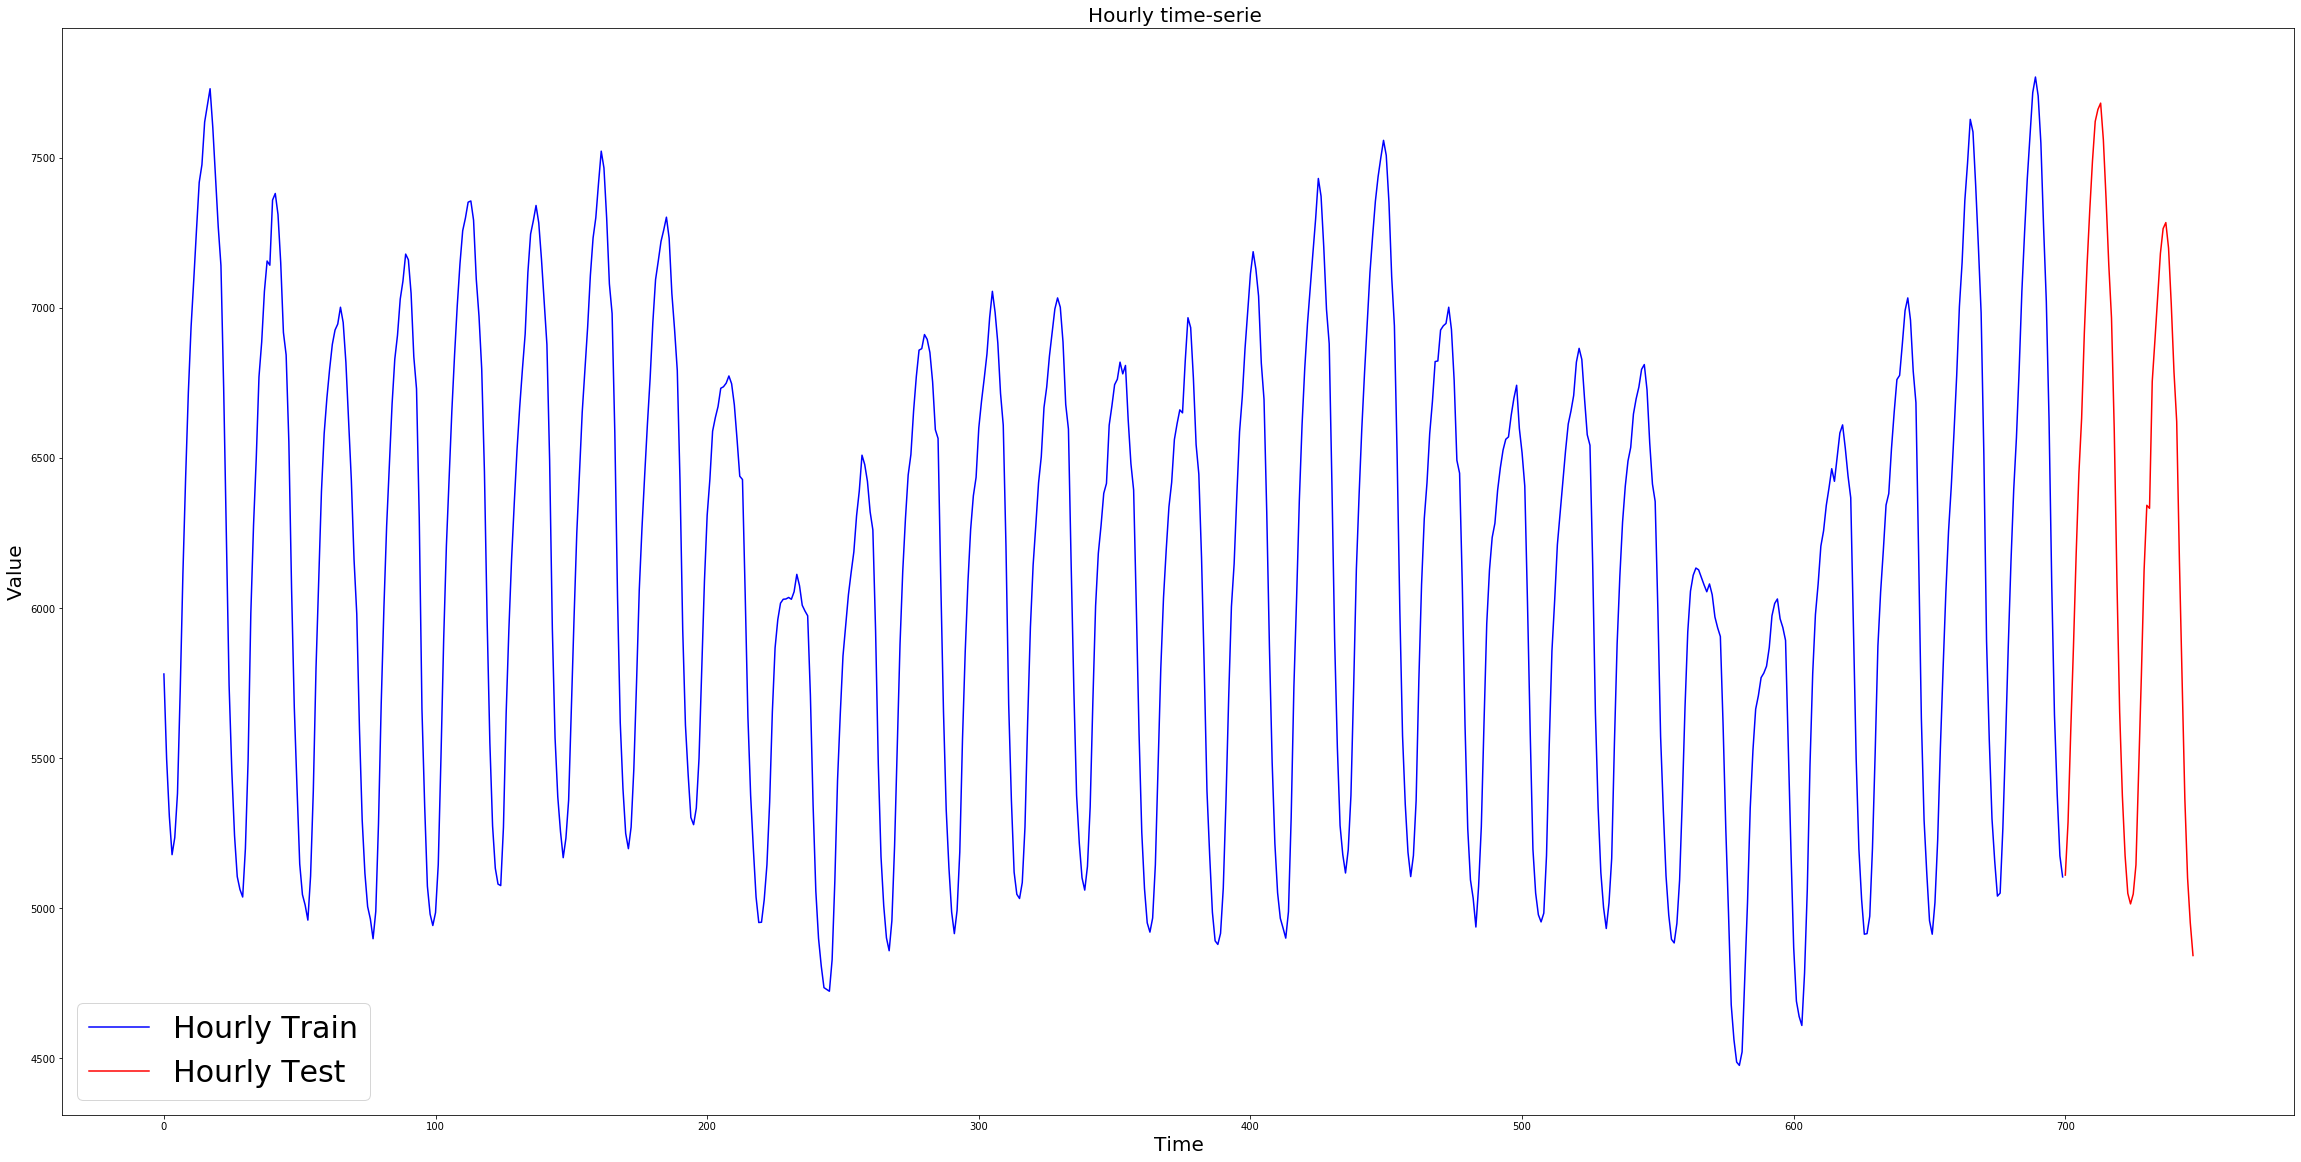

In [19]:
train_path = "../Dataset/splitted/Hourly-train.csv"
test_path = "../Dataset/splitted/Hourly-test.csv"
train_holdout_path = "../Dataset/splitted/Hourly-train-holdout.csv"
test_holdout_path = "../Dataset/splitted/Hourly-test-holdout.csv"


training_data = read_raw_data(train_path)
test_data = read_raw_data(test_path)
i=0
    
for x, y in zip(training_data, test_data):
    if i==5: 
        x = x[~np.isnan(x), np.newaxis]
        timex = np.arange(0, x.shape[0])
        timey = np.arange(x.shape[0], x.shape[0]  + y.shape[0])

        fig, axs = plt.subplots(1, 1, figsize=(40, 20))

        axs.plot(timex, x, color='b')
        axs.plot(timey, y, color='r')

        #axs.axvline(x=x.shape[0], color='g')

        axs.set_xlabel('Time', fontsize=20)
        axs.set_ylabel('Value', fontsize=20)    
        axs.set_title('Hourly time-serie ', fontsize=20)
        axs.legend(['Hourly Train', 'Hourly Test'], prop={'size': 30})
        plt.savefig('fig1.png')
    i+=1
    

    #if save_path !='':
    #    
    

-1.3723636468238032
0.14223636468238046
-1.5146000115061837
-1.2301272821414226


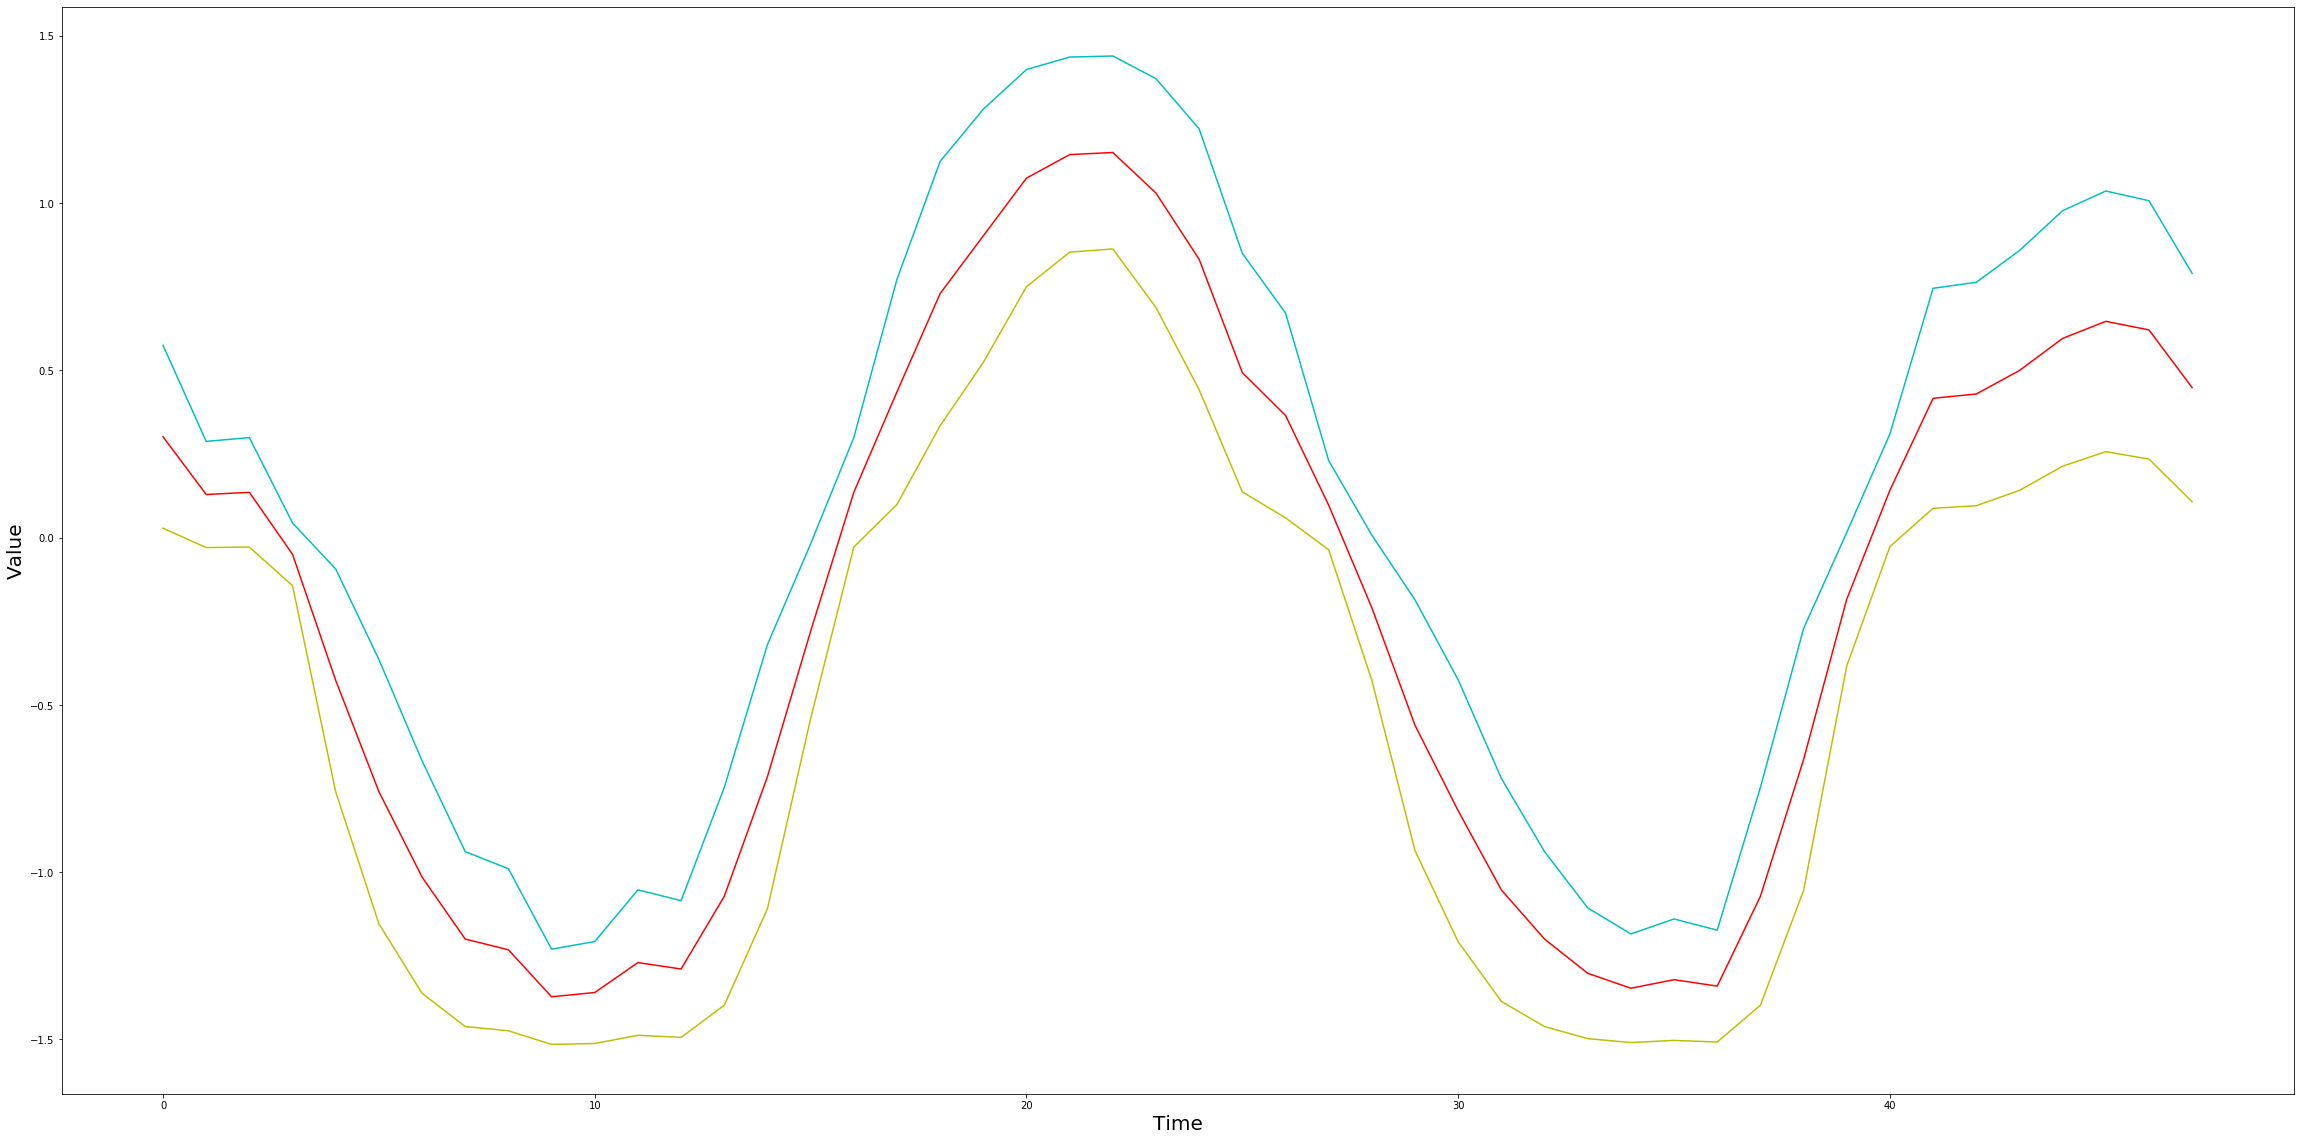

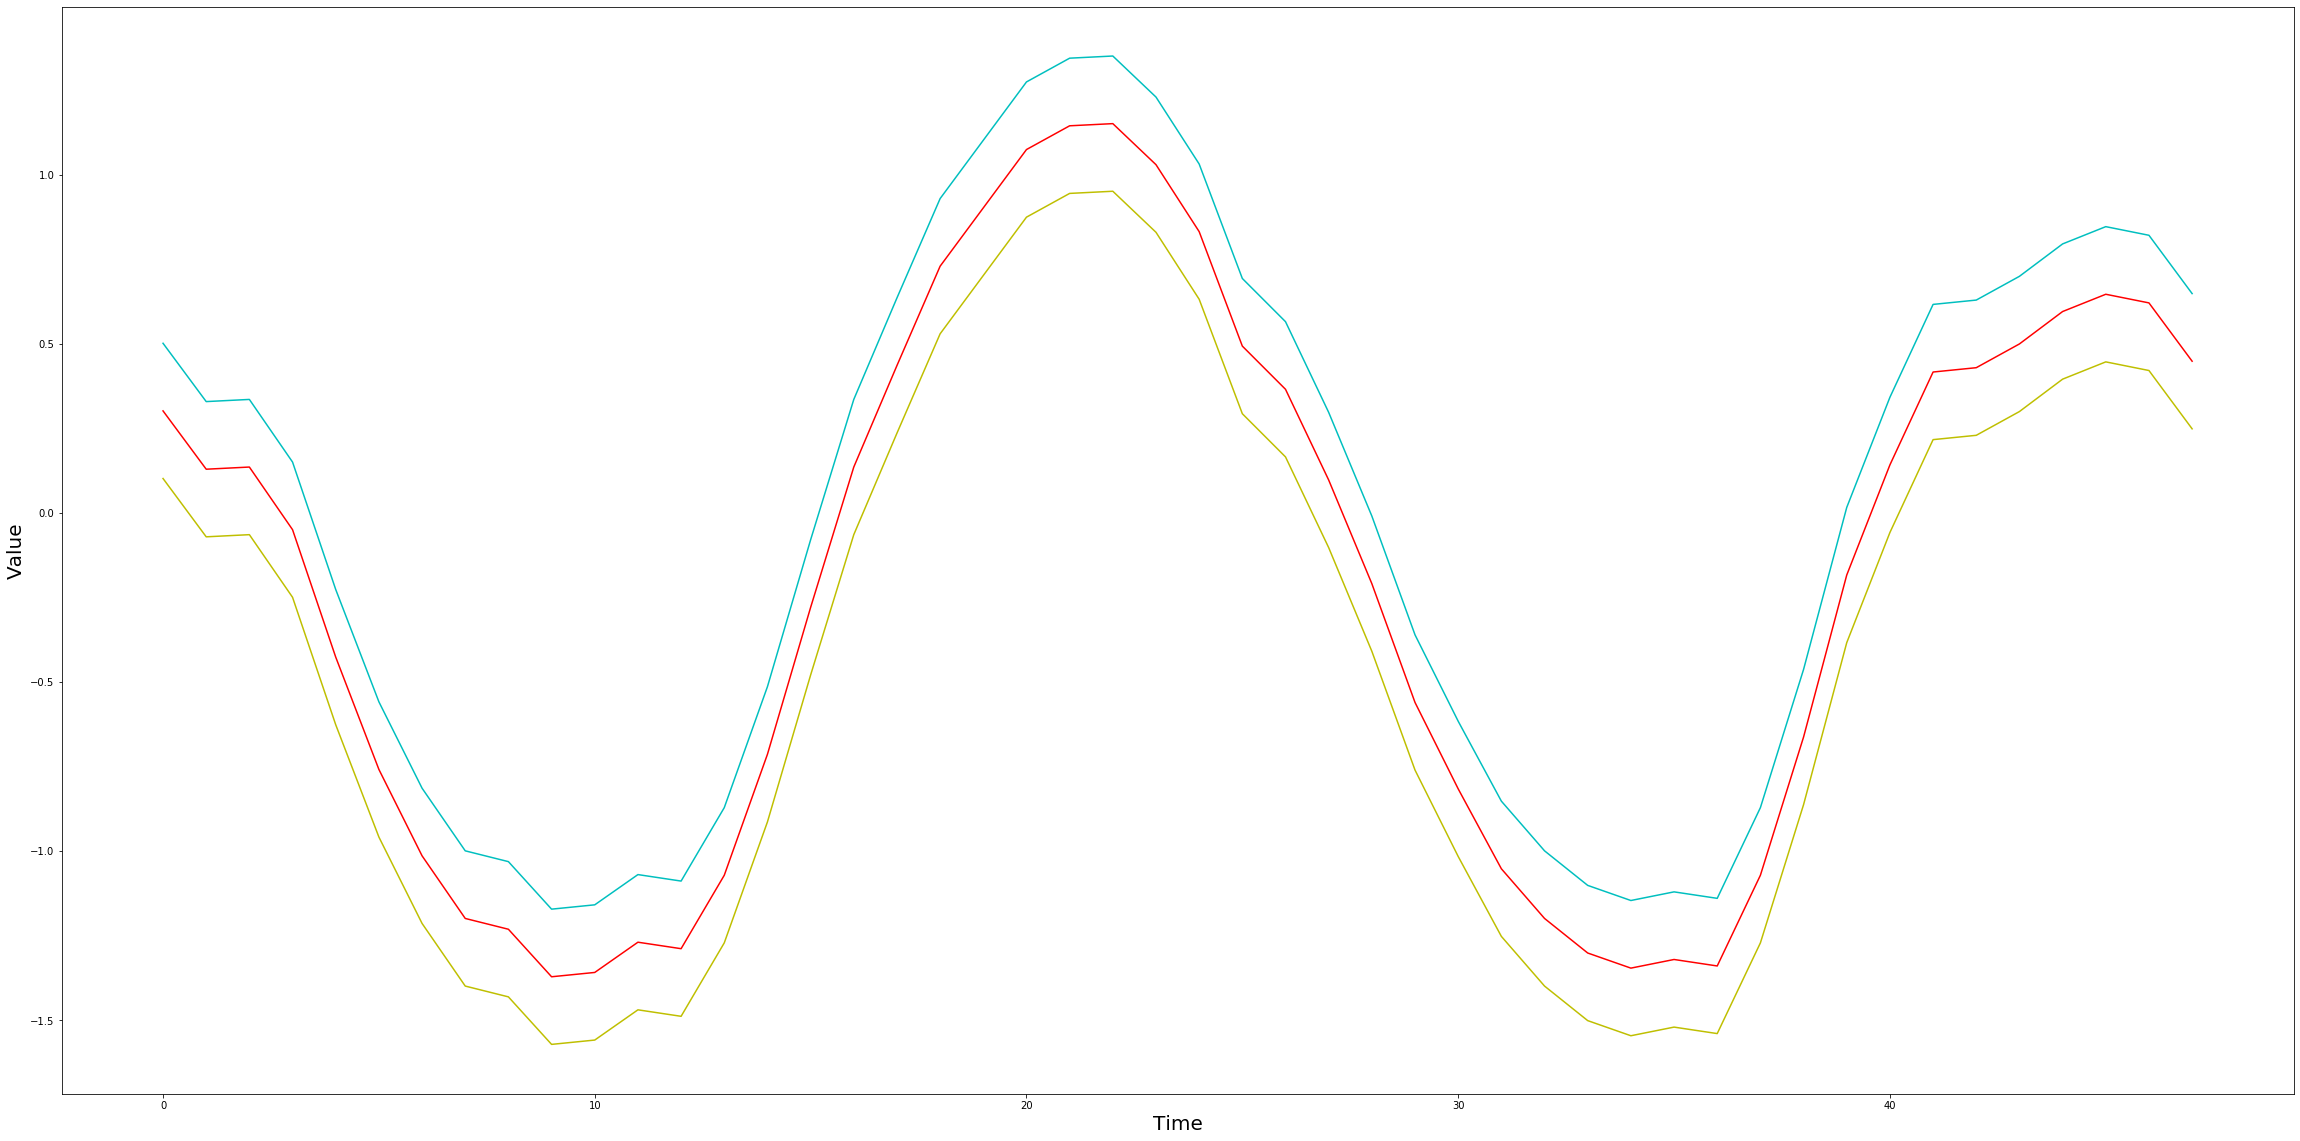

In [5]:

EPOCHS = 50
BATCH_SIZE = 128
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 30
FEATURES_NUMBER = 2
CLIP_VALUE = 0.5
LEARNING_RATE = 0.01
DROPOUT_RATIO = 0.2

OUTPUT_SIZE = HORIZON*2
PI_PARAMS = {'max_coff': 1, 'min_coff': 0.1, 'step': 0.3}

stdAugmentation = StdAugmentation(PI_PARAMS)
diffAugmentation = DiffAugmentation()
x_augmentations = [stdAugmentation]
y_augmentations = [stdAugmentation]

train_path = "../Dataset/splitted/Hourly-train.csv"
test_path = "../Dataset/splitted/Hourly-test.csv"
train_holdout_path = "../Dataset/splitted/Hourly-train-holdout.csv"
test_holdout_path = "../Dataset/splitted/Hourly-test-holdout.csv"

data_loader = M4DataLoader(train_path, test_path, train_holdout_path, test_holdout_path,
                           x_augmentations, y_augmentations, LOOKBACK, HORIZON)

train_x, train_y = data_loader.get_training_data()

for x, ykl in zip(train_x, train_y):

    mean = ykl[:48]
    std = ykl[48:]
    print("=================")

    points = mean
    lower = points - abs(std)
    upper = points + std
    
    print(mean[9])
    print(std[9])
    print(lower[9])
    print(upper[9])
    
    fig, axs = plt.subplots(1, 1, figsize=(40, 20))
    axis_x = np.arange(0, 48)
    axs.plot(axis_x, points, color='r')
    axs.plot(axis_x, lower, color='y')
    axs.plot(axis_x, upper, color='c')
    axs.set_xlabel('Time', fontsize=20)
    axs.set_ylabel('Value', fontsize=20)
    plt.savefig('alg_std.png')
    
    fig, axs = plt.subplots(1, 1, figsize=(40, 20))
    lower = points - 0.2
    upper = points + 0.2
    axis_x = np.arange(0, 48)
    axs.plot(axis_x, points, color='r')
    axs.plot(axis_x, lower, color='y')
    axs.plot(axis_x, upper, color='c')
    axs.set_xlabel('Time', fontsize=20)
    axs.set_ylabel('Value', fontsize=20)    
#    plt.savefig('same_std.png')
    break
